In [1]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('AbandonoEmpleados.csv', sep = ';', index_col= 'id', na_values='#N/D')
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


# BUSINESS ANALYTICS

In [5]:
df.info() # EMPEZAMOS CON EL ANALISIS DEL DATASET
#revisaremos las variables del dataset para responder las preguntas y obtenr el analisis y una salida

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

# ANALISIS DE NULOS

* para asegurar la calidad de los datos buscaremos los datos nulos y datos erroneos o datos atipicos como edades centenales.

 * detetctar nulos  si detectamos una variable con mas del 70% nulo esa variable no nos interesa o imputaremos el dato sustituyedo por la media del dato o estimando el dato

 isna() -> si el dato es nulo o no  <br>
 #sum() -> sumo el numero de nulos <br>
 sport_values() -> ordena los datos en orden ascendente si el dato es falso se ordena en desendente


In [7]:
df.isna().sum().sort_values(ascending= False) 

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
viajes                         0
carrera                        0
distancia_casa                 0
departamento                   0
satisfaccion_entorno           0
empleados                      0
nivel_laboral                  0
abandono                       0
edad                           0
estado_civil                   0
puesto                         0
salario_mes                    0
num_empresas_anteriores        0
incremento_salario_porc        0
evaluacion                     0
mayor_edad                     0
horas_extra                    0
horas_quincena                 0
satisfaccion_companeros        0
anos_experiencia               0
nivel_acciones                 0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
anos_con_m

# conclusion de datos nulos 

los que salen como resultado 0 no tienen ningun dato nulo pero las que si tenemos son 6 variables con datos nulos y la que tiene muchos datos nulos son:

* anos_en_puesto y concilacion --> lo cual se eliminaran estas dos variables 

* sexo, educacion, satisfaccion_trabajo, implicacion --> seran imputados tras realizar el EDA

 __Eliminacion de columnas(variables)__

In [9]:
df. drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)  
 #inplace = true->  aplica los cambios de manera directa  y definitiva sin esta obcion solo elimna temporalmente
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,15,Alta,Media,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,11,Alta,Alta,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,12,Alta,Muy_Alta,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,17,Alta,Alta,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,15,Alta,Baja,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,20,Muy_Alta,Media,80,1,6,0,6,0,3


In [10]:
df.info() # ahora solo apareceran 28 variables 

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

# EDA 

* realizare un analisis exploratorio de datos 
esto nos permite conocer los datos con los que estamos trabajando y encontrar posibles errores que dejamos.  

realizare un analisis separando variables categoricas con variables numericas <br>
categoricas --> todas aquellass que no son numericas (puesto, sexo ) <br>
numericas --> todas aquellas que son numeros (edad, salario)

__¿por que divido las varibales?__

se dividen las variables por el tipo de datos y si tengo 3 variables categoricas a esas 3 puedo realizarle el mismo tipo de analisis grafico eh igualmente con las numericas.

esto es de utilidad para la optimizacion de tiempo orientandolo por tipo de dato 

utilizando el siguente codigo podre utilizarlo para todas mis variable scategoricas y reducir tiempos en hacer una por una.


__(investigar como realizarlo en tableau)__

# EDA CATEGORICAS

In [32]:
# grafico categoricos

def grafico_eda(cat):  
    # Importamos las librerías necesarias
    from math import ceil  # ceil se usa para redondear hacia arriba
    
    # Calculamos el número de filas necesarias para el gráfico
    # Cada fila tendrá 2 columnas, así que dividimos el número de variables entre 2
    filas = ceil(cat.shape[1] / 2)  # Redondea hacia arriba en caso de número impar de variables

    # Definimos el gráfico con subplots; cada fila tendrá 2 gráficos (ncols=2)
    # El tamaño de la figura (figsize) depende del número de filas
    fig, ax = plt.subplots(nrows=filas, ncols=2, figsize=(16, filas * 6))

    # Aplanamos el array de ejes (ax) para que sea más fácil iterar sobre ellos
    ax = ax.flat  # 'ax' se convierte en una lista aplanada de ejes (gráficos)

    # Creamos un bucle para graficar cada variable categórica
    for cada, variable in enumerate(cat):
        # Contamos los valores únicos de cada variable y creamos un gráfico de barras horizontales
        cat[variable].value_counts().plot.barh(ax=ax[cada], color='skyblue')
        
        # Añadimos un título a cada gráfico basado en el nombre de la variable
        ax[cada].set_title(variable, fontsize=12, fontweight="bold")
        
        # Ajustamos el tamaño de las etiquetas de los ejes (nombres de las categorías)
        ax[cada].tick_params(labelsize=12)

    # Si hay subplots no utilizados (en caso de un número impar de variables), los ocultamos
    for i in range(cada + 1, len(ax)):
        fig.delaxes(ax[i])  # Eliminamos los ejes vacíos

    # Ajustamos el diseño del gráfico para que no se junten los subplots
    plt.tight_layout()
    

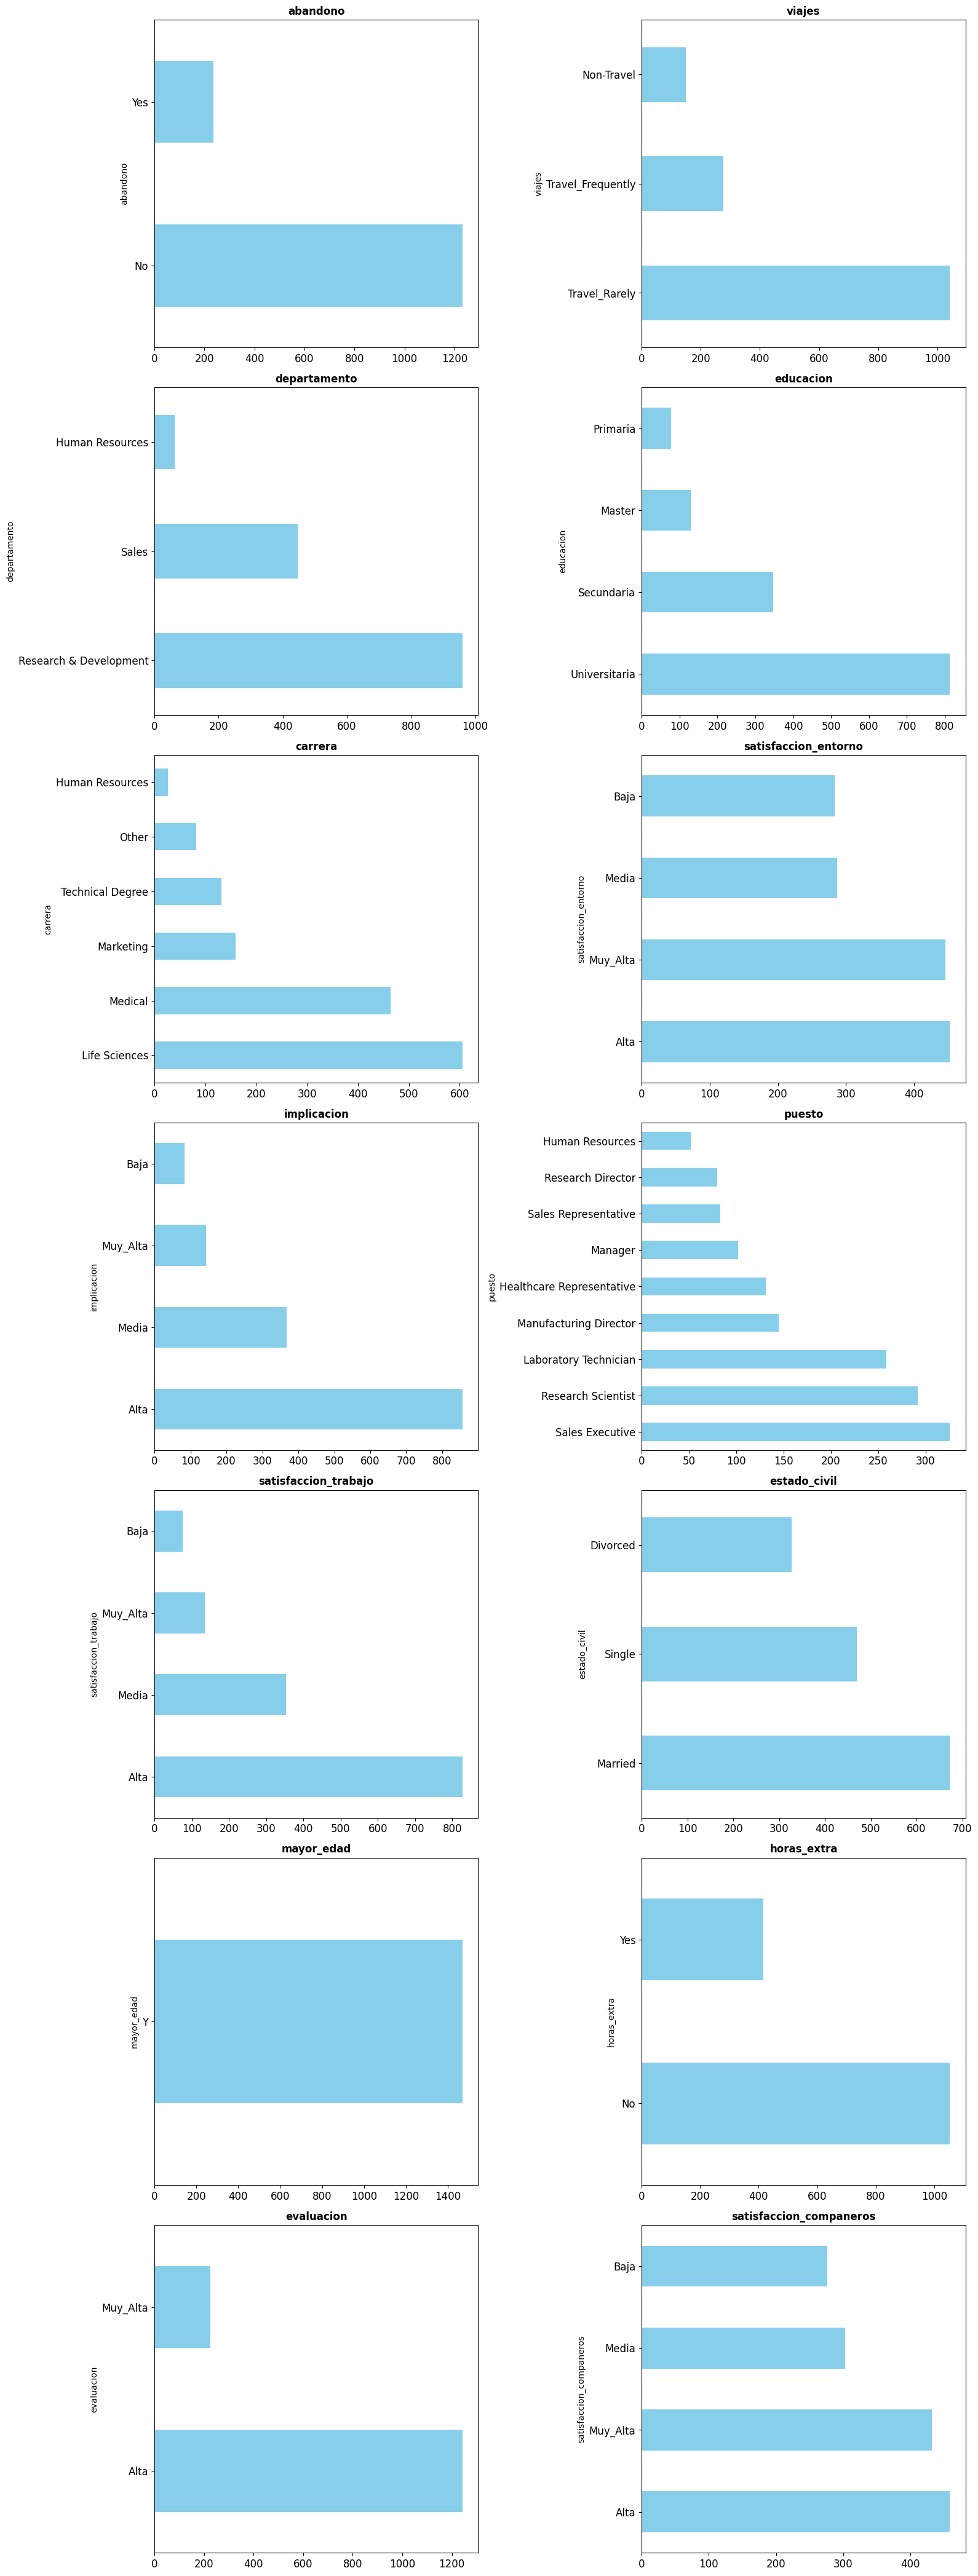

In [33]:
grafico_eda(df.select_dtypes('O'))

__ANALIZANDO LAS GRAFICAS CONOCEMOS LOS DETALLES DE CADA VARIABLE__

tras obtener las graficas y analizando las graficas llege a la conclusion de:<br>
* eliminar "mayor_edad" debido a que solo tiene un valor constante 
* imputar las variables :
    * educacion por universitaria<br>
    * satisfaccion_trabajo por  alta<br>
    * implicacion por alta<br>


__¿por que llegue a ese resultado?__ 

* por que al analizar las variables vemos que __mayor_edad__ solo tiene un valor el cual es constante y no aportaria nada al sistema.

* en la variable __educacion__ utilizamos universitaria debido a que minimizaremos los errores es imputando con el valor mas alto de la variable y pasaria lo mismo con __satisfaccion y implicacion__ 

In [34]:
df.drop(columns = 'mayor_edad', inplace = True)

df['educacion'] = df['educacion'].fillna('Universitaria')
                     #.fillna -> se utiliza para rellenar los valores faltantes
df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')

df['implicacion'] = df['implicacion'].fillna('Alta')

__¿como llegue a este resultado?__

1.- creando una funcion donde me muestre graficamente las variables categoricas todas a la ves. <br>
2.- analizando las graficas para encontar irregularidades en los valores y tomar una desciion. <br>
3.- creo conclusiones. <br>
4.- correcciones. 

# EDA NUMERICAS

__CREAMOS UNA FUNCION PARA LAS VARIABLES NUMERICAS CON UNA REPRESENTACION ESTADISTICA__ 

In [35]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [36]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


Conclusiones:

* Empleados solo tiene un valor --> Lo cual puede eliminarse
* Sexo tiene 4 valores --> Igual la eliminamos
* Horas quincena solo tiene una valor --> Eliminarla


In [37]:
df.drop(columns = ['empleados','sexo','horas_quincena'], inplace = True)
df #mostramos el nuevo dataset con los datos limpios.

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3
